In [4]:
!pip install scikit-learn

  Using cached scikit_learn-1.3.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
Using cached scikit_learn-1.3.2-cp310-cp310-win_amd64.whl (9.3 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


In [6]:
!pip install matplotlib

     ---------------------------------------- 0.0/156.8 kB ? eta -:--:--
     ------- ------------------------------- 30.7/156.8 kB 1.3 MB/s eta 0:00:01
     -------------- ---------------------- 61.4/156.8 kB 656.4 kB/s eta 0:00:01
     ------------------------- ---------- 112.6/156.8 kB 819.2 kB/s eta 0:00:01
     ------------------------------------ 156.8/156.8 kB 939.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.6 MB 3.2 MB/s eta 0:00:03
   - -------------------------------------- 0.2/7.6 MB 2.5 MB/s eta 0:00:03
   - -------------------------------------- 0.3/7.6 MB 2.6 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/7.6 MB 3.0 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/7.6 MB 3.1 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/7.6 MB 3.3 MB/s eta 0:00:03
   ----- ---------------------------------- 1.1/7.6 MB 3.4 MB/s eta 0:00:02
   ---

In [8]:
!pip install pandas

     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     -------- ------------------------------ 71.7/341.8 kB 2.0 MB/s eta 0:00:01
     ----------------- -------------------- 153.6/341.8 kB 1.8 MB/s eta 0:00:01
     --------------------------- ---------- 245.8/341.8 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 341.8/341.8 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.7 MB 2.2 MB/s eta 0:00:05
    --------------------------------------- 0.3/10.7 MB 2.6 MB/s eta 0:00:04
   - -------------------------------------- 0.4/10.7 MB 3.0 MB/s eta 0:00:04
   - -------------------------------------- 0.5/10.7 MB 2.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/10.7 MB 2.7 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/10.7 MB 2.8 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/10.7 MB 2.8 MB/s eta 0:00:0

In [9]:
!pip install seaborn

   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.6 kB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 112.6/294.6 kB 1.7 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.6 kB 1.6 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.6 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 1.4 MB/s eta 0:00:00


In [6]:
# Dependencies
from scipy.stats import binom
from sklearn.datasets import load_diabetes, load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, LinearSVR, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import recall_score, mean_absolute_percentage_error
from collections import Counter
from matplotlib import pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

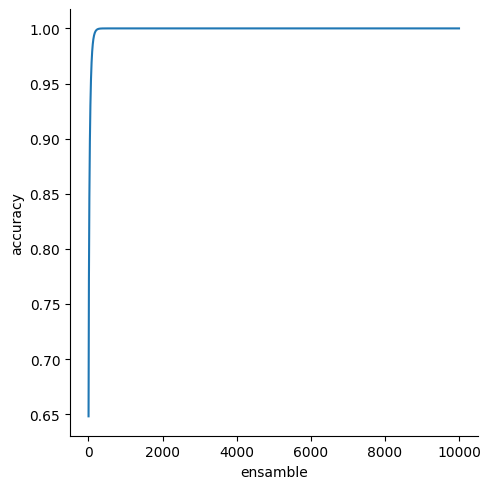

In [2]:
N = range(3, 10002, 2)
cdf_c = [1 - binom.cdf(np.floor(n / 2), n, 0.60) for n in N]
df = pd.DataFrame(dict(accuracy=cdf_c, ensamble=N))
_ = sns.relplot(data=df, x='ensamble', y='accuracy', kind='line')

In [3]:
N

range(3, 10002, 2)

In [4]:
len(cdf_c)

5000

In [5]:
df

,accuracy,ensamble
0,0.648000,3
1,0.682560,5
2,0.710208,7
3,0.733432,9
4,0.753498,11
...,...,...
4995,1.000000,9993
4996,1.000000,9995
4997,1.000000,9997
4998,1.000000,9999


## Bagging (Bootstrap aggregation)

Combinar M instancias idenpendientes de un tipo de algoritmo. 
Genera M instancias del algortimo y la combinación se realiza mediante votación o el promedio en caso de regresión. O en su caso que se cuente con la probabilidad de cada clase.

## Ejemplo: Digitos

In [7]:
X, y = load_digits(return_X_y=True)
T, G, y_t, y_g = train_test_split(X, y,
                                  test_size=0.2,
                                  random_state=0)

In [17]:
np.unique(y) # 10 clases

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
X.shape

(1797, 64)

In [19]:
y.shape

(1797,)

In [20]:
np.unique(X)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16.])

Los algoritmos a utilizarán de base son Máquinas de Soporte Vectorial y Árboles de decisión.

Paso 1: Se entrena una instancia de estos algortimos para poder comparar su rendimiento para poder comparar su rendimiento en el conjunto de prueba contra a Bagging.

La siguientes instrucciones entrenan una máquina de soporte vectorial, calculando en la segunda línea el macro-recall. El rendimiento se presenta en una tabla para facilitar la comparación.

In [21]:
svc = LinearSVC(dual=False).fit(T, y_t) # Dado que tenemos n_muestras > n_features (utilizar optimización directa en lugar de lagrangeano es más rápida)
svc_recall = recall_score(y_g, svc.predict(G),
                          average="macro")

In [22]:
svc_recall

0.9449859016322432

In [23]:
svc

LinearSVC(dual=False)

### Árbol de decisión con el criterio de entropía central

In [25]:
tree = DecisionTreeClassifier(criterion='entropy',
                              min_samples_split=9).fit(T, y_t)
tree_recall = recall_score(y_g, tree.predict(G),
                           average="macro")

In [26]:
tree_recall

0.8287613756053622

El algoritmo de Bootstrap inicia generando las muestras con remplazo tal y como se realiza a continuación en el ejemplo del error estándar de la media; el siguiente código genera las muestras, en particular el ensamble sería de  elementos.

#### Ejemplo desviación de la mediana (Bootstrap)

In [34]:
from scipy.stats import norm


In [35]:
p1 = norm(loc=1, scale=2)


In [37]:
D = p1.rvs(size=(500, 1000))
mu = [x.mean() for x in D]

In [38]:
D_mediana = D[0]

In [41]:
se = np.std(mu)

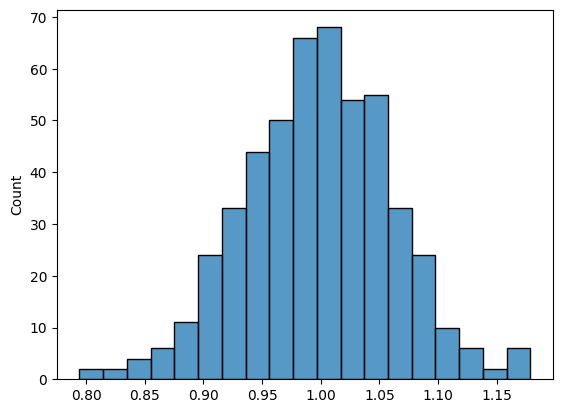

In [42]:
fig = sns.histplot(mu)

In [43]:
D_mediana = D[0]


In [44]:
S = np.random.randint(D_mediana.shape[0],
                      size=(500, D_mediana.shape[0]))
B = [np.median(D_mediana[s]) for s in S]
se = np.std(B)

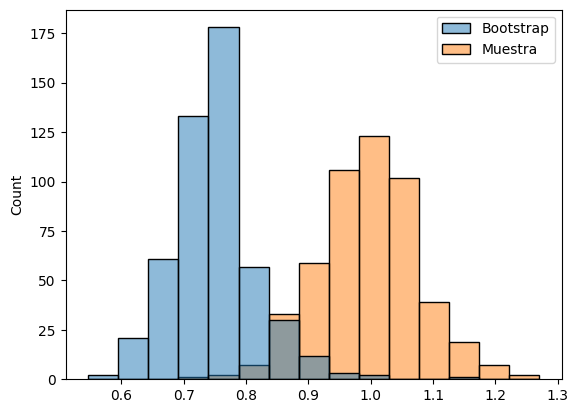

In [45]:
df = pd.DataFrame(dict(Bootstrap=B, 
                       Muestra=[np.median(x) for x in D]))
fig = sns.histplot(df)                       

# Ahora apliquemos la misma técnica 
Se generarán las muestras con reemplazo basadas en el conjunto de entrenamiento con tamaño de muestra M = 11.

In [51]:
# 11 muestras con reemplazo
B = np.random.randint(T.shape[0],
                      size=(11, T.shape[0]))

In [52]:
B.shape

(11, 1437)

In [53]:
df

,Bootstrap,Muestra
0,0.778972,0.755820
1,0.709252,0.980079
2,0.799516,0.934226
3,0.769045,1.029557
4,0.728434,1.024635
...,...,...
495,0.702399,0.944640
496,0.676781,0.985734
497,0.732356,1.064058
498,0.749600,1.073849


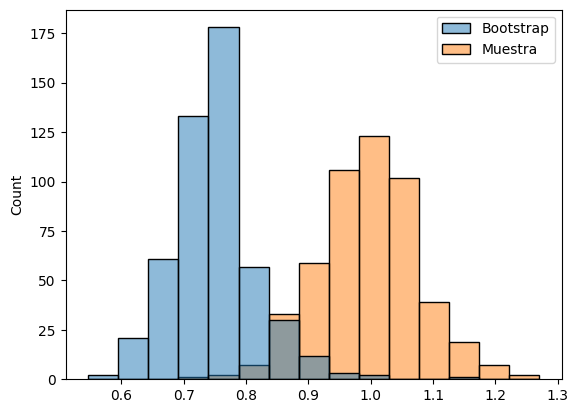

In [54]:
fig = sns.histplot(df) 

Empezando con Bagging usando como clasificador base la Máquina de Soporte Vectorial Lineal. La primera línea de las siguientes instrucciones, entra los máquinas de soporte, después se realizan las predicciones. En la tercera línea se calcula la clase que tuvo la mayor cantidad de votos y finalmente se calcula el error en términos de macro-recall.

In [75]:
# Se calcula una máquina de soporte vectorial para cada una de las 11 muestras
svc_ins = [LinearSVC(dual=False).fit(T[b], y_t[b])
           for b in B]

# Predicciones para cada máquina de soporte vectorial
hys = np.array([m.predict(G) for m in svc_ins])

# Cantidad de votos
hy = np.array([Counter(x).most_common(n=1)[0][0]
               for x in hys.T])
#
bsvc_recall = recall_score(y_g, hy, average="macro")

In [70]:
hys[[0]]

array([[2, 4, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
        8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 8, 0, 1, 8, 6, 7, 7,
        9, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 8, 6, 3, 0, 2, 3, 4, 1, 9,
        2, 6, 9, 1, 8, 3, 5, 1, 2, 1, 2, 2, 9, 7, 1, 3, 6, 0, 5, 3, 7, 5,
        1, 2, 3, 9, 3, 1, 1, 7, 4, 8, 5, 9, 5, 5, 2, 6, 9, 0, 7, 1, 4, 1,
        3, 4, 8, 9, 7, 9, 8, 0, 6, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
        9, 5, 9, 9, 5, 7, 5, 6, 1, 8, 6, 7, 6, 1, 5, 1, 5, 9, 8, 1, 5, 3,
        6, 1, 8, 9, 7, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
        3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
        6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 1, 2, 1, 4, 2, 1, 6, 9, 9,
        2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 0, 2, 0, 7, 6, 1, 1,
        9, 7, 2, 7, 8, 5, 5, 7, 5, 3, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
        9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 1, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
        5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 

In [71]:
counters = [Counter(inner_list) for inner_list in hys[[0]]]
counters

[Counter({6: 45,
          9: 41,
          1: 40,
          7: 39,
          5: 39,
          8: 35,
          4: 31,
          3: 31,
          2: 30,
          0: 29})]

In [77]:
bsvc_recall

0.9580615116590726

In [62]:
hy.shape

(360,)

### Aplicando los Árboles de Decisión

In [76]:
tree_ins = [DecisionTreeClassifier(criterion='entropy',
                                   min_samples_split=9).fit(T[b], y_t[b])
            for b in B]
hys = np.array([m.predict(G) for m in tree_ins])
hy = np.array([Counter(x).most_common(n=1)[0][0]
               for x in hys.T])
btree_recall = recall_score(y_g, hy,
                            average="macro")

In [78]:
btree_recall

0.9442725940539229

Como se mencionó, la predicción final se puede realizar de dos manera en clasificación una es usando votación, como se vió en los códigos anteriores y la segunda es utilizando el promedio de las probabilidades. En el caso de las Máquinas de Soporte Vectorial, estas no calculan las probabilidad de cada clase, pero se cuenta con el valor de la función de decisión, en el siguiente código se usa está información, la segunda y tercera línea normaliza los valores para que ningún valor sea mayor que  y menor que
 y finalmente se calcula la suma para después seleccionar la clase que corresponde al argumento máximo.

In [79]:
hys = np.array([m.decision_function(G) for m in svc_ins])
hys = np.where(hys > 1, 1, hys)
hys = np.where(hys < -1, -1, hys)
hys = hys.sum(axis=0)
csvc_recall = recall_score(y_g, hys.argmax(axis=1),
                           average="macro")

In [80]:
csvc_recall

0.9584871970847582

In [81]:
hys

array([[-11.        , -11.        ,  11.        , ..., -11.        ,
        -11.        , -11.        ],
       [-11.        , -11.        , -11.        , ..., -11.        ,
          1.97876618, -11.        ],
       [-11.        , -11.        ,  11.        , ..., -11.        ,
        -11.        , -11.        ],
       ...,
       [-11.        , -11.        , -11.        , ..., -11.        ,
        -10.13769083, -11.        ],
       [-11.        ,  -8.23701498, -11.        , ..., -11.        ,
         -1.27690186, -11.        ],
       [-11.        , -11.        , -11.        , ..., -11.        ,
          7.06288113,  -9.83433857]])

In [82]:
hys = np.array([m.predict_proba(G)
                for m in tree_ins])
ctree_recall = recall_score(y_g,
                            hys.sum(axis=0).argmax(axis=1),
                            average="macro")

Comparando los diferentes rendimientos, se puede observar que no existe mucha diferencia en rendimiento en las M.S.V Lineal y que la mayor mejora se presentó en los Árboles de Decisión. Este comportamiento es esperado dado que para que Bagging funciones adecuadamente requiere algoritmos inestables, es decir, algoritmos cuyo comportamiento cambia considerablemente con un cambio pequeño en el conjunto de entrenamiento, este es el caso de los Árboles. Por otro lado las M.S.V son algoritmos estables y un cambio pequeño en su conjunto de entrenamiento no tendrá una repercusión considerable en el comportamiento del algoritmo.

## Diabetes, dataset

In [83]:
# Obteniendo la información
X, y = load_diabetes(return_X_y=True)
T, G, y_t, y_g = train_test_split(X, y,
                                  random_state=0,
                                  test_size=0.2)

In [86]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [88]:
# Se impleementa el SVM y su macro recall TP/TP + FN

In [87]:
svr = LinearSVR(dual='auto').fit(T, y_t)
svr_mape = mean_absolute_percentage_error(y_g,
                                          svr.predict(G))

In [89]:
svr_mape

0.413082365578524

In [90]:
# Implementación de árboles de decición
tree = DecisionTreeRegressor(min_samples_split=9).fit(T,
                                                      y_t)
tree_mape = mean_absolute_percentage_error(y_g,
                                           tree.predict(G))

Al igual que en el caso de clasificación, la siguiente instrucción genera los índices para generar las muestras. Se hace un ensamble de elementos.

In [91]:
B = np.random.randint(T.shape[0], size=(11, T.shape[0]))


In [93]:
B.shape

(11, 353)

En el caso de regresión, la predicción final corresponde al promedio de las predicciones individuales, la primera línea de las siguientes instrucciones se entrena las M.S.V Lineal, en la segunda instrucción se hacen las predicciones y se en la tercera se realiza el promedio y se mide el rendimiento.

In [94]:
svr_ins = [LinearSVR(dual='auto').fit(T[b], y_t[b])
           for b in B]
hys = np.array([m.predict(G) for m in svr_ins])
bsvr_mape = mean_absolute_percentage_error(y_g,
                                           hys.mean(axis=0))

In [95]:
bsvr_mape

0.4128981579139169

In [96]:
# En el caso de los árboles: 
tree_ins = [DecisionTreeRegressor(min_samples_split=9).fit(T[b], y_t[b])
            for b in B]
hys = np.array([m.predict(G) for m in tree_ins])
btree_mape = mean_absolute_percentage_error(y_g,
                                            hys.mean(axis=0))

In [97]:
btree_mape

0.4288384454007738

Hasta este momento los ensambles han sido de elementos, queda la duda como varía el rendimiento con respecto al tamaño del ensamble. La Figura muestra el rendimiento de Bagging utilizando Árboles de Decisión, cuando el ensamble cambia. Se observa que alrededor que hay un decremento importante cuando el ensamble es pequeño, después el error se incrementa y vuelve a bajar alrededor de 
 Finalmente se ve que el rendimiento es estable cuando 

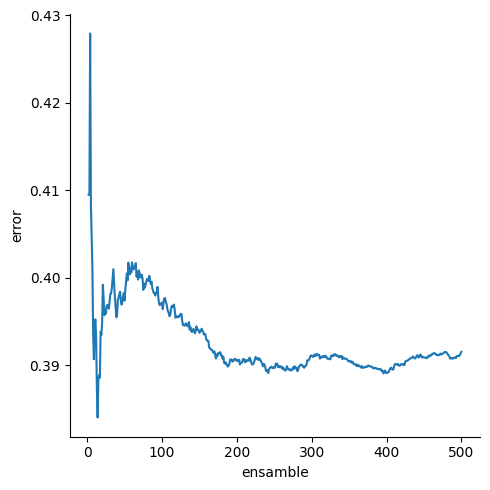

In [107]:
B = np.random.randint(T.shape[0], size=(500, T.shape[0]))
tree_ins = [DecisionTreeRegressor(min_samples_split=9).fit(T[b], y_t[b]) for b in B]
hys = np.array([m.predict(G) for m in tree_ins])

M = range(2, len(tree_ins) + 1)
p = [mean_absolute_percentage_error(y_g, 
                                    hys[:i].mean(axis=0))
     for i in M]
df = pd.DataFrame(dict(error=p, ensamble=M))
sns.relplot(data=df, x='ensamble', y='error', kind='line')
plt.savefig('performance.jpg')

In [106]:
print(np.min(p))
p[9]

0.38935055864297213


0.38935055864297213